In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from numpy import unravel_index
%matplotlib inline

In [2]:
X, y,wt= make_regression(n_features=1, n_informative=1, noise=8,random_state=42, coef=True)


In [3]:
def basis(X):
    """
    Use a basis function to incorporate the bias weight, by adding a feature of all 1s to the X data.
    """
    onescol = np.ones((X.shape[0],1))
    return np.concatenate([onescol, X], axis=1)

def loglikelihood(w, X, t, beta, alpha):
    """
    Not the full log likelihood - we ignore the constant terms for simplicity.
    """
    e = t-X.dot(w) # w has shape n_attributes, n_outputs
    regularizer = (alpha / -2.0) * w.T.dot(w)
    e=(beta/-2.0)*np.sum(e**2)
    return e+regularizer


    

In [4]:
Xadj = basis(X) #apply our basis function
y = y.reshape((len(y),1)) # ensure the y data is 2 dimensional.

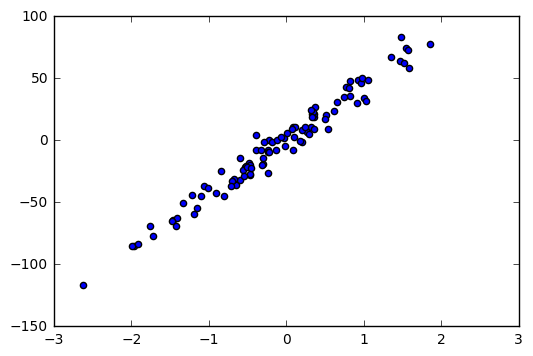

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

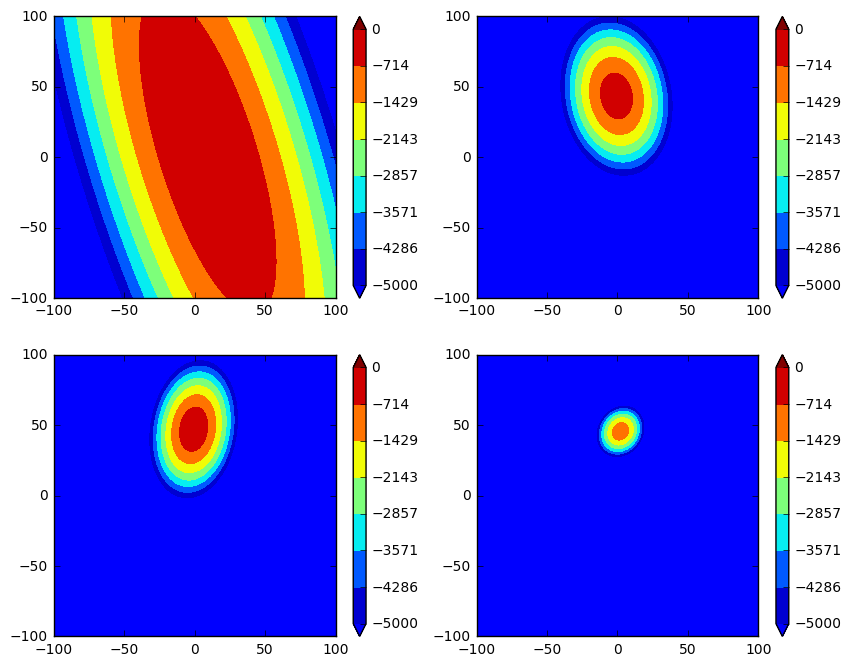

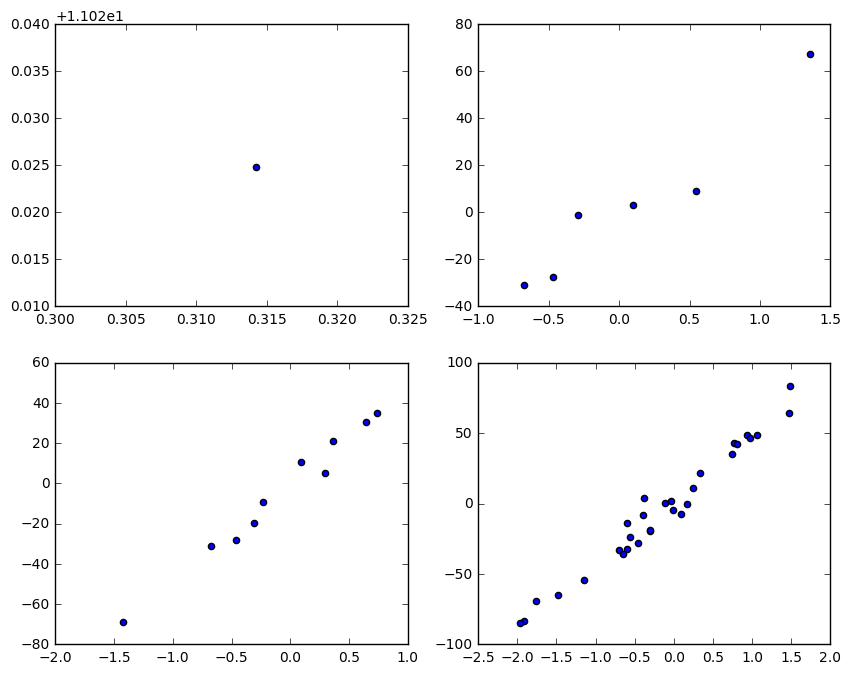

In [12]:
w0 = np.linspace(-100,100, 100)
w1 = np.linspace(-100,100, 100)

W0, W1 = np.meshgrid(w0, w1)
L = np.zeros(W0.shape) # our matrix to hold the likelihoods.

levels = np.linspace(-0.5e4,0,8) # levels for making our contour plot clearer.
s = [1,6,10,30] #number of samples at each iteration

fig = plt.figure(figsize=(10,8))
fig2 = plt.figure(figsize=(10,8))
for i in range(4):
    ax = fig.add_subplot(221+i)
    ax2 = fig2.add_subplot(221+i)
    
    #So use random.choice to pick s[i] points from Xadj, to see how the likelihood evolves
    ind = np.random.choice(np.arange(Xadj.shape[0]),s[i], replace=False)
    tx = Xadj[ind,:]
    txp = X[ind,:]
    ty = y[ind,:]
    
    #iterate through each point on our grid of points, and compute the likelihood at each point.
    #plot the points as well to help visualise the data.
    for row in range(W0.shape[0]):
        for col in range(W0.shape[1]):
            weights = np.zeros((2,1))
            weights[0,0] = W0[row, col]
            weights[1,0] = W1[row,col]
            L[row, col] = loglikelihood(weights, tx,ty,1,0.1)
    
    cS = ax.contourf(W0, W1, L, levels, extend="both")
    cS.cmap.set_under("blue")

    fig.colorbar(cS)
    ax2.scatter(txp,ty)
